# Outliers
Outliers are data points  that are very different from most of the values in a dataset.
They can happen because of data entry mistakes, measurement errors, or rare real world events.
Sometimes outliers are useful ( for example in fraud detection), but often they can reduce model accuracy and give misleading results.
Thats why identifying and handling outliers is an important step in data processing.
# How to detect outliers?
### They are 2 methods: IQR method, Z-score method
### Method 1: IQR method
The interquarrtile range method focuses on the spread of the middle 50% of data, IT calculates
the IQR as the difference between the 75th  and 25th percemtiles  of the data and identifies outliers as those points are 
that fall below 1.5 times the IQR  above the 75th percentile. THis method is robust to outliers and does not assume a normal distribution
### Steps to detect outliers:
    Step 1: Find Q1(25th percentage) and Q3(75th percentage)
    Step 2: IQR=Q3-Q1
    Step 3: Find:
        Lower bound: Q1-1.5*IQR
        Upper bound: Q3+1.5*IQR
### Method 2: Z-Score
It is a stastistical technique that detects outliers based on hoow far a data point is from the mean, measured 
in terms of standard deviation. It lies in the extreme tails of the distribution.
It assumes the data follows a normal distribution.
A point with a high or low Z-score (typically |Z|?3) is flagges as an outlier because it lies in the extreme tails of the distribution.
## formula:
Z=(x-mean)/standard deviation
## Why threshold:
Z>3  very strict (large datasets)
Z>2  practical for small datasets


In [1]:

import pandas as pd
data=pd.DataFrame({
    "study_hours":[1,2,3,4,5,6,7,8,9,20]
})
data

,study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,20


In [3]:
data.describe()

,study_hours
count,10.000000
mean,6.500000
std,5.400617
min,1.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,20.000000


# IQR method

In [7]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
outliers=data[(data<(LB))|(data>(UB))]
outliers


,study_hours
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,20.0


In [8]:
Q1

study_hours    3.25
Name: 0.25, dtype: float64

In [9]:
Q3

study_hours    7.75
Name: 0.75, dtype: float64

In [10]:
IQR

study_hours    4.5
dtype: float64

In [11]:
LB

study_hours   -3.5
dtype: float64

In [12]:
UB

study_hours    14.5
dtype: float64

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


# Z-Score Method

In [4]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [5]:

import pandas as pd
data=pd.DataFrame({
    "study_hours":[1,2,3,4,5,6,7,8,9,20]
})
data

,study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,20


In [9]:
Z_score=np.abs(stats.zscore(data["study_hours"]))
outliers=data[Z_score>2] # we need to take 2 because the dataset is small
outliers

,study_hours
9,20


In [11]:
Z_score=np.abs(stats.zscore(data["study_hours"]))
outliers=data[Z_score>3]
outliers

,study_hours


In [12]:
stats.zscore(data["study_hours"])

0   -1.07349
1   -0.87831
2   -0.68313
3   -0.48795
4   -0.29277
5   -0.09759
6    0.09759
7    0.29277
8    0.48795
9    2.63493
Name: study_hours, dtype: float64

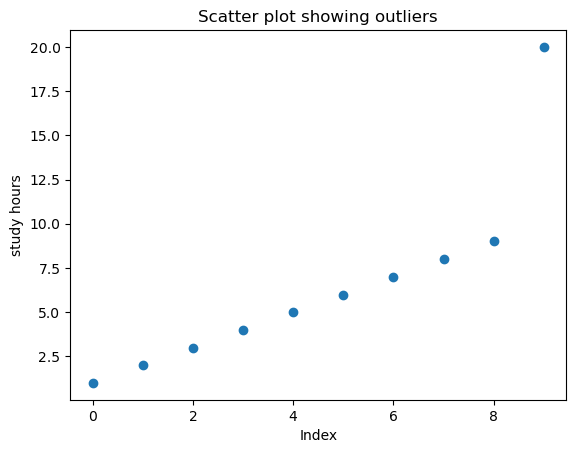

In [13]:
plt.scatter(range(len(data)),data["study_hours"])
plt.xlabel("Index")
plt.ylabel("study hours")
plt.title("Scatter plot showing outliers")
plt.show()

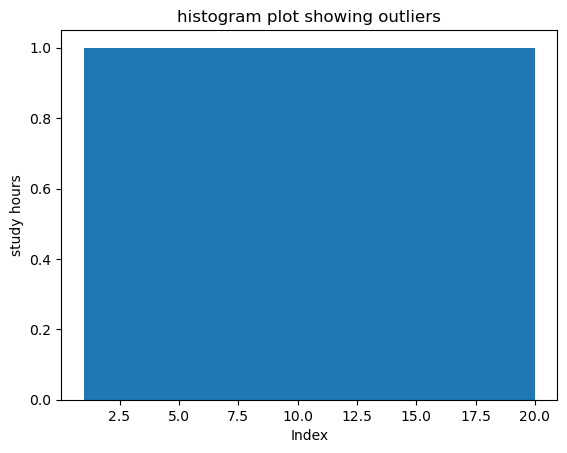

In [15]:
plt.hist(range(len(data)),data["study_hours"])
plt.xlabel("Index")
plt.ylabel("study hours")
plt.title("histogram plot showing outliers")
plt.show()

In [17]:
plt.hist(range(len(data)),data["study_hours"],bins=6)
plt.xlabel("Index")
plt.ylabel("study hours")
plt.title("histogram plot showing outliers")
plt.show()

TypeError: hist() got multiple values for argument 'bins'

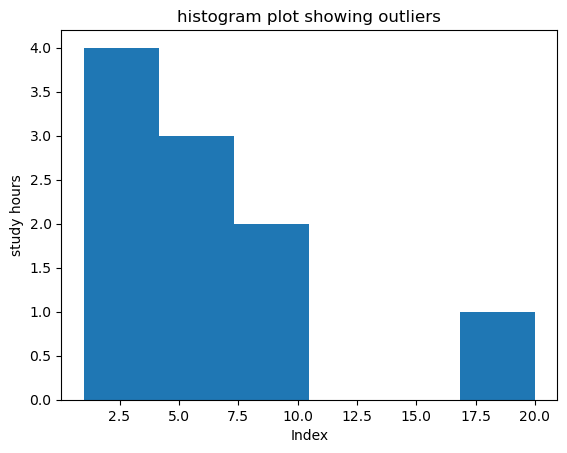

In [18]:
plt.hist(data["study_hours"],bins=6)
plt.xlabel("Index")
plt.ylabel("study hours")
plt.title("histogram plot showing outliers")
plt.show()

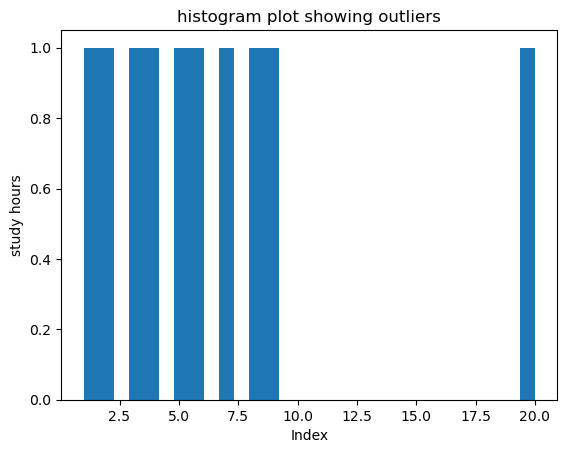

In [24]:
plt.hist(data["study_hours"],bins=30)
plt.xlabel("Index")
plt.ylabel("study hours")
plt.title("histogram plot showing outliers")
plt.show()